<a href="https://colab.research.google.com/github/iNuman/PytorchDeepLearnignPlayGround/blob/main/MnistPlayGroundPyTorchDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
    # Input layer (4 features of the flower) -->
    # Hidden Layer1 (number of neurons) -->
    # H2 (n) -->
    # Output (3 classes of iris flowers)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()  # instantiate our nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
# Manual seed for randomization
torch.manual_seed(31)
# Class Instantiation
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url);

In [ ]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
# Change last column to string
label_map = {'Setosa': 0.0, 'Versicolor': 1.0, 'Virginica': 2.0}
my_df['variety'] = my_df['variety'].map(label_map).astype(float)

In [ ]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# Train test split X, y
X = my_df.drop("variety", axis=1)
y = my_df["variety"]

In [ ]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,variety
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=31)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#  Set the criterion of model to measure the error, how far are the predictions are from data
criterion = nn.CrossEntropyLoss()
# Chossing optimizer(Adam), learning rate lr (if the error raate doesn't go down after bunch of iterations(epochs), lower the learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [ ]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []

for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train) # Get predicted results

    # Measure the loss/error, gonna be high at first
    loss = criterion(y_pred, y_train) # predicted values vs the y_train

    # Keep Track of our losses
    # .detach().numpy() is used to move the loss value from the computation graph
    # to the CPU and convert it to a NumPy array, then take the scalar value.
    losses.append(loss.detach().numpy())

    # print every 10 epoch
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss.item():.4f}') # .item() gets the scalar value of the tensor

    # Do some back propagation: take the error rate of forward propagation and feed it back
    # thru the network to fine tune the weights

    # Zero the gradients before running the backward pass.
    # This is crucial because by default, gradients are accumulated in PyTorch.
    optimizer.zero_grad()
    loss.backward() # Computes the gradients of the loss with respect to the model parameters
    optimizer.step() # Updates the model parameters using the gradients computed in backward()

print("\nTraining complete!")

Epoch: 0 and loss: 1.0937
Epoch: 10 and loss: 0.9542
Epoch: 20 and loss: 0.7630
Epoch: 30 and loss: 0.5463
Epoch: 40 and loss: 0.4007
Epoch: 50 and loss: 0.3098
Epoch: 60 and loss: 0.2280
Epoch: 70 and loss: 0.1555
Epoch: 80 and loss: 0.1056
Epoch: 90 and loss: 0.0771

Training complete!


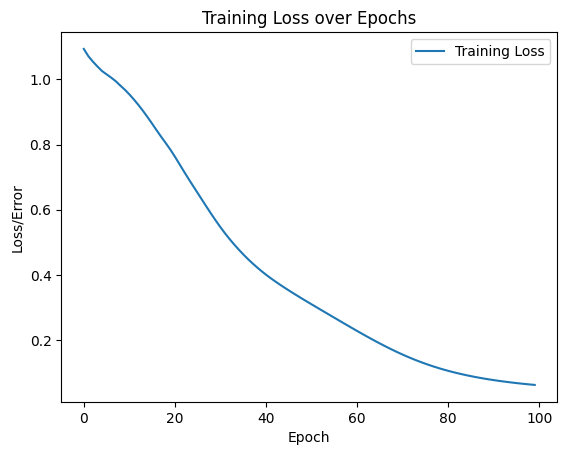

In [ ]:
# Plot the training loss
plt.plot(range(epochs), losses, label='Training Loss') # Plot the losses list
plt.title('Training Loss over Epochs') # Add a title to the plot
plt.xlabel('Epoch') # Label the x-axis
plt.ylabel('Loss/Error') # Label the y-axis
plt.grid(False) # Add a grid for easier reading
plt.legend() # Display the legend
plt.show() # Show the plot

In [ ]:
# Basically turn off back propagation (gradient calculations)
with torch.no_grad():
    y_eval = model.forward(X_test) # X_test are features from our test set
    loss = criterion(y_eval, y_test) # Find the loss or error

print(f"Test Loss: {loss.item():.4f}")

Test Loss: 0.1675


In [ ]:
# Turn off gradient calculations as we are only evaluating
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        # Forward pass for a single data point.
        # .unsqueeze(0) adds a batch dimension as models typically expect batch input.
        y_val = model.forward(data.unsqueeze(0))

        # Determine the true flower type based on y_test[i]
        # This part maps the numerical true label to a string representation
        if y_test[i] == 0:
            x = "Setosa"
        elif y_test[i] == 1:
            x = 'Versicolor'
        else:
            x = 'Virginica'

        # Will tell us what type of flower class our network thinks it is
        # str(y_val) shows the raw output tensor from the model (logits)
        # y_val.argmax().item() gets the index of the highest logit, which is the predicted class
        print(f'{i+1}. {str(y_val)}\t {x}\t {y_test[i]} \t {y_val.argmax().item()}')

        # Correct or not: Check if the predicted class matches the true class
        if y_val.argmax().item() == y_test[i].item(): # .item() to get scalar value from tensor
            correct += 1

print(f'\nWe got {correct} correct!')

1. tensor([[-2.5918,  4.0058,  3.3213]])	 Versicolor	 1 	 1
2. tensor([[-6.1411,  3.0714,  8.9016]])	 Virginica	 2 	 2
3. tensor([[  7.4557,   2.7430, -10.7721]])	 Setosa	 0 	 0
4. tensor([[-1.3471,  4.4318,  1.3384]])	 Versicolor	 1 	 1
5. tensor([[-5.0695,  3.6746,  7.1322]])	 Virginica	 2 	 2
6. tensor([[  7.4716,   2.7478, -10.7957]])	 Setosa	 0 	 0
7. tensor([[-3.7070,  3.8116,  5.0484]])	 Virginica	 2 	 2
8. tensor([[-0.9983,  4.5914,  0.7721]])	 Versicolor	 1 	 1
9. tensor([[  8.8675,   3.1819, -12.8756]])	 Setosa	 0 	 0
10. tensor([[  7.9793,   2.9621, -11.5676]])	 Setosa	 0 	 0
11. tensor([[-4.3481,  3.5253,  6.0873]])	 Virginica	 2 	 2
12. tensor([[-2.1640,  4.4561,  2.5596]])	 Versicolor	 1 	 1
13. tensor([[-3.6296,  3.8168,  4.9307]])	 Virginica	 2 	 2
14. tensor([[  7.0962,   2.6344, -10.2368]])	 Setosa	 0 	 0
15. tensor([[-6.3609,  3.9439,  9.0020]])	 Virginica	 2 	 2
16. tensor([[-3.8991,  3.6405,  5.3822]])	 Versicolor	 1 	 2
17. tensor([[-2.9925,  3.9978,  3.9256]])	 V